<a href="https://colab.research.google.com/github/Aayush050502/SMA-Strategy-On-TCS-Stock/blob/main/SMA_Strategy_on_TCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# 1. Data Collection: Download TCS stock data
ticker = 'TCS.NS'  # TCS on NSE
tcs_data = yf.download(ticker, start='2022-08-15', end='2024-08-15', interval='1d')


[*********************100%%**********************]  1 of 1 completed


In [3]:
# 2. Simple Moving Average (SMA) Strategy
# Define short-term (20 days) and long-term (50 days) SMAs
tcs_data['SMA_20'] = tcs_data['Close'].rolling(window=20).mean()
tcs_data['SMA_50'] = tcs_data['Close'].rolling(window=50).mean()


In [4]:
# Define the Buy and Sell signals
tcs_data['Signal'] = 0
tcs_data['Signal'][20:] = np.where(tcs_data['SMA_20'][20:] > tcs_data['SMA_50'][20:], 1, 0)
tcs_data['Position'] = tcs_data['Signal'].diff()


<ipython-input-4-3ad1dd1c688e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tcs_data['Signal'][20:] = np.where(tcs_data['SMA_20'][20:] > tcs_data['SMA_50'][20:], 1, 0)


In [7]:
# 3. Backtesting
initial_capital = 100000  # Initial capital
share_size = 10  # Number of shares bought per trade

# Track the daily position value and the portfolio value
tcs_data['Portfolio Value'] = initial_capital
tcs_data['Daily Return'] = 0
capital = initial_capital

for index, row in tcs_data.iterrows():
    if row['Position'] == 1:  # Buy Signal
        shares_bought = capital // row['Close']
        capital -= shares_bought * row['Close']
        tcs_data.loc[index:, 'Portfolio Value'] += shares_bought * row['Close']
    elif row['Position'] == -1:  # Sell Signal
        capital += shares_bought * row['Close']
        tcs_data.loc[index:, 'Portfolio Value'] = capital

<ipython-input-7-99963ea9c0e8>:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 197250.99853516 197250.99853516 197250.99853516 197250.99853516
 1

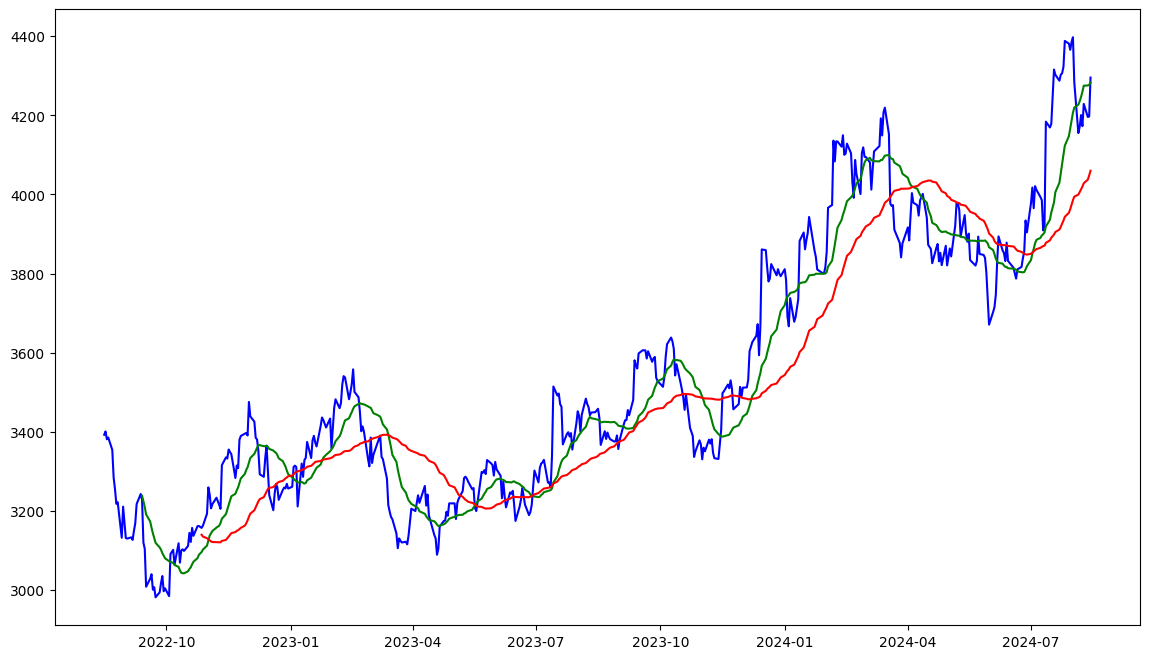

In [8]:
# 4. Reporting
# Plot stock price along with SMA
plt.figure(figsize=(14, 8))
plt.plot(tcs_data['Close'], label='TCS Stock Price', color='blue')
plt.plot(tcs_data['SMA_20'], label='20-Day SMA', color='green')
plt.plot(tcs_data['SMA_50'], label='50-Day SMA', color='red')


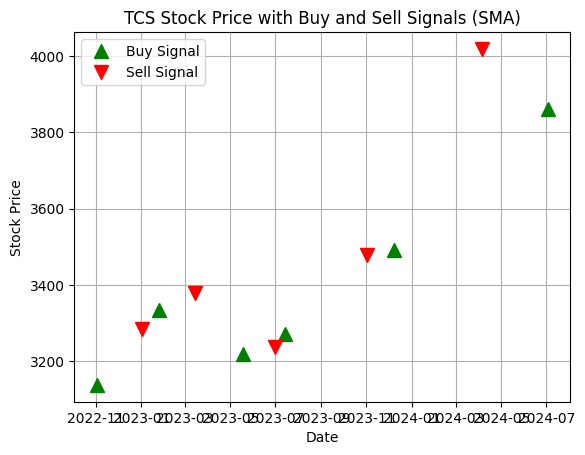

In [9]:
# Mark Buy and Sell signals
plt.plot(tcs_data[tcs_data['Position'] == 1].index, tcs_data['SMA_20'][tcs_data['Position'] == 1], '^', markersize=10, color='g', label='Buy Signal')
plt.plot(tcs_data[tcs_data['Position'] == -1].index, tcs_data['SMA_20'][tcs_data['Position'] == -1], 'v', markersize=10, color='r', label='Sell Signal')

plt.title('TCS Stock Price with Buy and Sell Signals (SMA)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid()
plt.show()


In [10]:
# Generate performance metrics
total_trades = tcs_data['Position'].abs().sum()
winning_trades = np.sum((tcs_data['Signal'] == 1) & (tcs_data['Close'].shift(-1) > tcs_data['Close']))
losing_trades = total_trades - winning_trades
max_drawdown = (tcs_data['Portfolio Value'].max() - tcs_data['Portfolio Value'].min()) / tcs_data['Portfolio Value'].max()


In [12]:
if total_trades > 0:
    winning_percentage = (winning_trades / total_trades) * 100
    losing_percentage = (losing_trades / total_trades) * 100

    print(f"Winning Trades: {winning_percentage:.2f}%")
    print(f"Losing Trades: {losing_percentage:.2f}%")
else:
    print("Not enough trades to calculate win/loss percentages.")


Winning Trades: 1272.73%
Losing Trades: -1172.73%


In [11]:
# Report key metrics
print(f"Initial Capital: ₹{initial_capital}")
print(f"Final Portfolio Value: ₹{tcs_data['Portfolio Value'].iloc[-1]:.2f}")
print(f"Total Returns: ₹{tcs_data['Portfolio Value'].iloc[-1] - initial_capital:.2f}")
print(f"Number of Trades: {total_trades}")
print(f"Winning Trades (%): {winning_trades / total_trades * 100:.2f}%")
print(f"Losing Trades (%): {losing_trades / total_trades * 100:.2f}%")
print(f"Maximum Drawdown: {max_drawdown * 100:.2f}%")


Initial Capital: ₹100000
Final Portfolio Value: ₹200639.60
Total Returns: ₹100639.60
Number of Trades: 11.0
Winning Trades (%): 1272.73%
Losing Trades (%): -1172.73%
Maximum Drawdown: 53.80%
